In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n=100, ro=2):
    x1 = np.random.multivariate_normal(mean=[0,0], cov=np.identity(2),size=n)
    x2 = np.random.multivariate_normal(mean=[ro,ro], cov=np.identity(2),size=n)
    y1 = np.array([1 for i in range(n)])
    y2 = np.array([-1 for i in range(n)])
    y = np.concatenate((y1,y2))
    x = np.concatenate((x1,x2))
    idx = np.random.permutation(2*n)
    x = x[idx,:]
    y = y[idx]
    return x,y

def sgn(x):
    return x / abs(x)

def accuracy(y, y_hat):
    return sum(y == y_hat)/len(y)

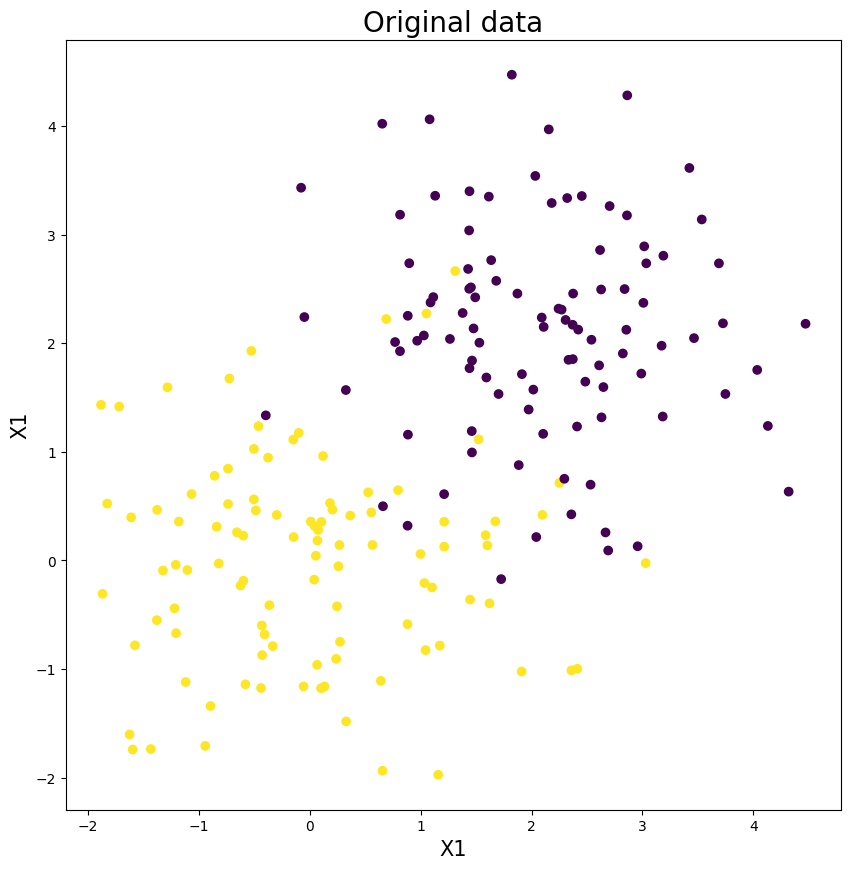

In [2]:
x,y = generate_data(ro=2)

plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X1", fontsize=15)
plt.title("Original data", fontsize=20)
plt.show()

In [3]:
np.column_stack((x, np.ones(200))) # adding ones

array([[ 0.52702686,  0.62749181,  1.        ],
       [-1.71869519,  1.41640365,  1.        ],
       [ 2.63143429,  1.31761327,  1.        ],
       [ 0.99865128,  0.05976141,  1.        ],
       [ 0.3651901 ,  0.4136625 ,  1.        ],
       [-1.18079811,  0.35862068,  1.        ],
       [ 0.10514564,  0.35528625,  1.        ],
       [-0.52595274,  1.9295856 ,  1.        ],
       [-0.09853167,  1.17479195,  1.        ],
       [ 1.08124446,  4.06150779,  1.        ],
       [ 0.27320909, -0.74845235,  1.        ],
       [ 1.68206732,  2.57465356,  1.        ],
       [-0.43931298, -1.17434811,  1.        ],
       [ 1.61518824,  3.3496319 ,  1.        ],
       [ 1.31237737,  2.66461291,  1.        ],
       [ 2.54065238,  2.03219116,  1.        ],
       [ 1.21249446,  0.35680579,  1.        ],
       [ 1.21232755,  0.12718764,  1.        ],
       [ 1.87280395,  2.45703621,  1.        ],
       [ 1.03376244, -0.20786947,  1.        ],
       [ 3.00900045,  2.37180857,  1.   

In [4]:
from Algorithm import CoordinateDescent

cd = CoordinateDescent(C=2)
cd.fit(np.column_stack((x, np.ones(200))),y)

In [5]:
w = cd.process()

In [6]:
w # the last one is the bias

array([-0.55450273, -0.64700494,  1.25606181])

In [7]:
y_hat = (w[0:-1] @ x.T) + w[-1]
y_hat = sgn(y_hat)

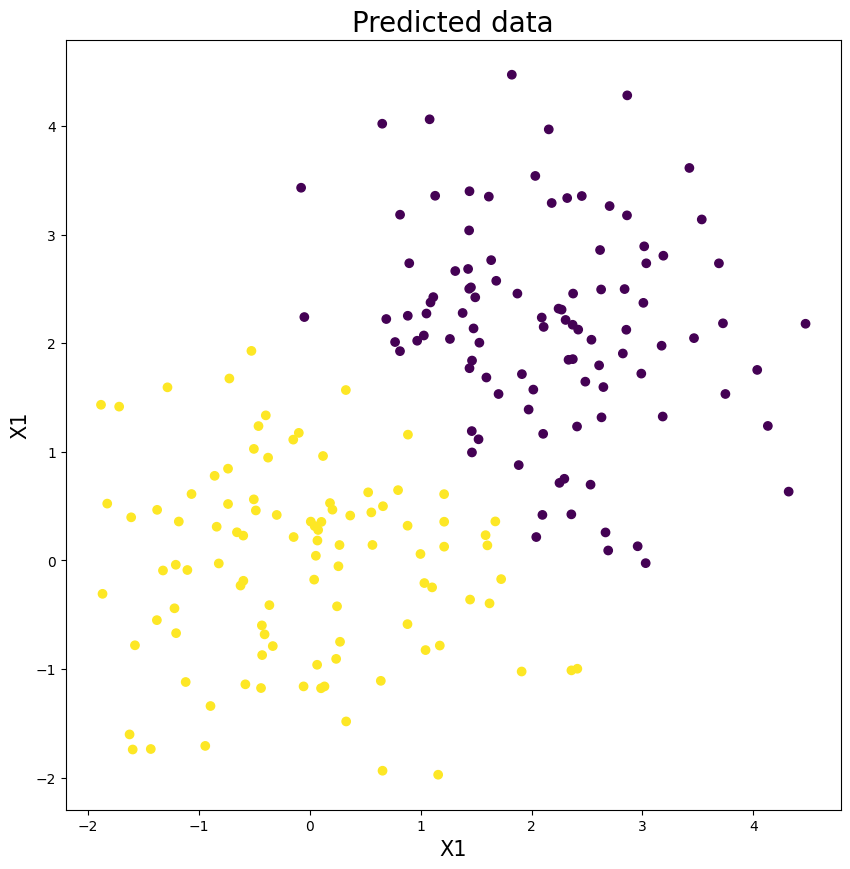

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y_hat)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X1", fontsize=15)
plt.title("Predicted data", fontsize=20)
plt.show()

In [9]:
accuracy(y, y_hat)

0.93